### Handling missing data(numerical) - Simple Imputer

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [75]:
url = "https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv"
df = pd.read_csv(url)
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [76]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [77]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [78]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [80]:
X_train.shape, X_test.shape

((712, 3), (179, 3))

In [81]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [82]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

In [83]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
405,34.0,21.00,1,34.0,34.000000,21.00,21.00
417,18.0,13.00,2,18.0,18.000000,13.00,13.00
45,NaN,8.05,0,29.0,29.745184,8.05,8.05
690,31.0,57.00,1,31.0,31.000000,57.00,57.00
526,50.0,10.50,0,50.0,50.000000,10.50,10.50


In [84]:
print("Original Age variable: ", X_train['Age'].var())
print("Age Variance after median imputation: ", X_train["Age_median"].var())
print("Age Variance after mean imputation: ", X_train["Age_mean"].var())

print("Original Fare variable: ", X_train['Fare'].var())
print("Fare Variance after median imputation: ", X_train["Fare_median"].var())
print("Fare Variance after mean imputation: ", X_train["Fare_mean"].var())

Original Age variable:  213.7165085187575
Age Variance after median imputation:  171.42222438960792
Age Variance after mean imputation:  171.33390978297015
Original Fare variable:  2574.352620663723
Fare Variance after median imputation:  2448.8970247777565
Fare Variance after mean imputation:  2433.143405184278


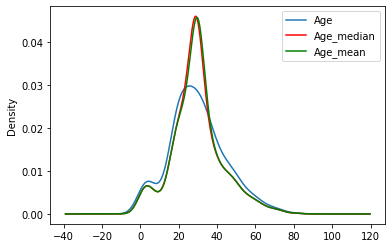

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

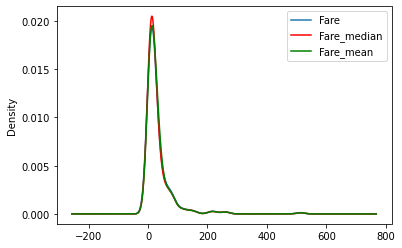

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [87]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,213.716509,84.480223,-6.393469,213.716509,213.716509,79.420930,79.571049
Fare,84.480223,2574.352621,17.050423,68.754981,67.493301,2574.352621,2574.352621
Family,-6.393469,17.050423,2.770177,-5.121468,-5.125566,16.285129,16.115167
Age_median,213.716509,68.754981,-5.121468,171.422224,171.333910,64.831778,64.983611
Age_mean,213.716509,67.493301,-5.125566,171.333910,171.333910,63.670788,63.791137
Fare_median,79.420930,2574.352621,16.285129,64.831778,63.670788,2448.897025,2433.143405
Fare_mean,79.571049,2574.352621,16.115167,64.983611,63.791137,2433.143405,2433.143405


In [88]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.106334,-0.295318,1.000000,1.000000,0.103346,0.103929
Fare,0.106334,1.000000,0.198661,0.102921,0.101058,1.000000,1.000000
Family,-0.295318,0.198661,1.000000,-0.235021,-0.235270,0.197721,0.196290
Age_median,1.000000,0.102921,-0.235021,1.000000,0.999742,0.100062,0.100620
Age_mean,1.000000,0.101058,-0.235270,0.999742,1.000000,0.098295,0.098800
Fare_median,0.103346,1.000000,0.197721,0.100062,0.098295,1.000000,0.996778
Fare_mean,0.103929,1.000000,0.196290,0.100620,0.098800,0.996778,1.000000


<AxesSubplot:>

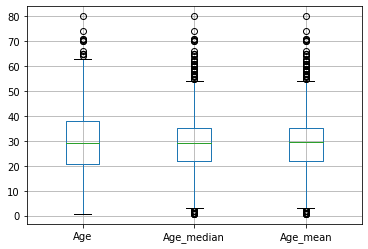

In [89]:
X_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<AxesSubplot:>

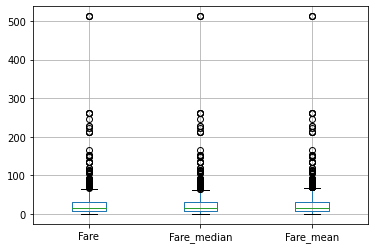

In [90]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

### Using Sklearn

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [92]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [93]:
trf = ColumnTransformer([
    ('imputer1', imputer1,['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [94]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [95]:
trf.named_transformers_['imputer1'].statistics_

array([29.])

In [96]:
trf.named_transformers_['imputer2'].statistics_

array([31.88531382])

In [97]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [98]:
X_train

array([[29.    , 15.2458,  2.    ],
       [31.    , 10.5   ,  0.    ],
       [31.    , 37.0042,  2.    ],
       ...,
       [29.    ,  7.7333,  0.    ],
       [36.    , 17.4   ,  1.    ],
       [60.    , 39.    ,  2.    ]])

# Arbitrary-value-imputation

In [99]:
X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [100]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train["Age_minus1"] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train["Fare_minus1"] = X_train['Fare'].fillna(-1)

In [101]:
print("Original Age variable: ", X_train['Age'].var())
print("Age Variance after median imputation: ", X_train["Age_99"].var())
print("Age Variance after mean imputation: ", X_train["Age_minus1"].var())

print("Original Fare variable: ", X_train['Fare'].var())
print("Fare Variance after median imputation: ", X_train["Fare_999"].var())
print("Fare Variance after mean imputation: ", X_train["Fare_minus1"].var())

Original Age variable:  204.34951339046142
Age Variance after median imputation:  951.7275570187188
Age Variance after mean imputation:  318.0896202624488
Original Fare variable:  2448.1979137063163
Fare Variance after median imputation:  47219.202652176304
Fare Variance after mean imputation:  2378.5676784883494


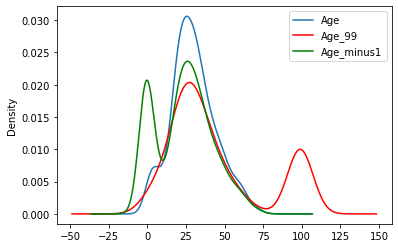

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

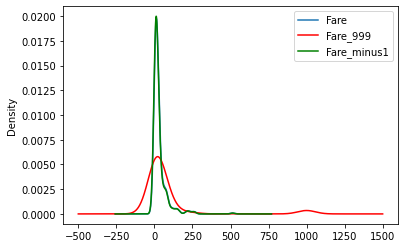

In [103]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

<AxesSubplot:>

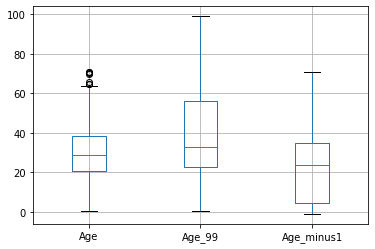

In [104]:
X_train[['Age', 'Age_99', 'Age_minus1']].boxplot()

<AxesSubplot:>

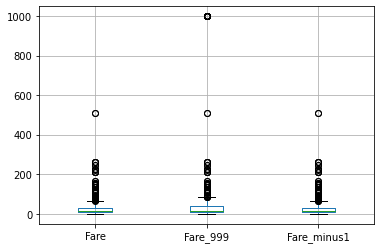

In [105]:
X_train[['Fare', 'Fare_999', 'Fare_minus1']].boxplot()

### Use sklearn

In [106]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [107]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [108]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [109]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [110]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [ ]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [112]:
X_train

array([[ 40.    ,  27.7208,   0.    , ...,  40.    ,  27.7208,  27.7208],
       [  4.    ,  16.7   ,   2.    , ...,   4.    ,  16.7   ,  16.7   ],
       [ 47.    ,   9.    ,   0.    , ...,  47.    ,   9.    ,   9.    ],
       ...,
       [ 71.    ,  49.5042,   0.    , ...,  71.    ,  49.5042,  49.5042],
       [ 99.    , 221.7792,   0.    , ...,  -1.    , 221.7792, 221.7792],
       [ 99.    ,  25.925 ,   0.    , ...,  -1.    ,  25.925 ,  25.925 ]])